In [1]:
import os
# uncomment if problems with dependencies
# %pip install pm4py
# %pip install pandas
import pm4py
import datetime as dt
import time
import pandas

from pm4py.visualization.petri_net import visualizer as pn_visualizer

path = os.getcwd()
parent = os.path.dirname(path)

# Change path if necessary 
file_path = parent + "/../csv/example-dummy-6-events.csv"
file_path_other_model = parent + "/../csv/example-dummy-ethereum-4-events.csv"

import sys

if __name__ == '__main__':
    print(sys.argv)
    print(parent)
    print(file_path)



# import sys

# accept command line arguments
# inputArg1 = sys.argv[1]

#print('inputArg1: ',inputArg1)


['/usr/local/lib/python3.8/dist-packages/ipykernel_launcher.py', '-f', '/home/bruno/.local/share/jupyter/runtime/kernel-85cfe7fb-4cec-4b85-affb-ff95bb09e084.json']
/home/bruno/Documentos/blockchain-integration-framework/packages/cactus-plugin-cc-tx-visualization/src/test/fixtures
/home/bruno/Documentos/blockchain-integration-framework/packages/cactus-plugin-cc-tx-visualization/src/test/fixtures/../csv/use-case-besu-fabric-6-events.csv


In [2]:
def import_csv_original(file_path):
    event_log = pandas.read_csv(file_path, sep=';')
    event_log = pm4py.format_dataframe(event_log, case_id='caseID', activity_key='methodName', timestamp_key='timestamp')
    return event_log

def getStartActivities(event_log):
    s = pm4py.get_start_activities(event_log)
    print("Start activities: {}\n".format(s))
    return s
def getEndActivities(event_log):
    e = pm4py.get_end_activities(event_log)
    print("End activities: {}\n".format(e))
    return (e)

def getAttributeFromLog(event_log, attr):
    entries = pm4py.get_event_attribute_values(event_log,attr)
    print("Entries: {}\n".format(entries))
    return entries


In [3]:

log = import_csv_original(file_path)
log_other_model = import_csv_original(file_path_other_model)

net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(log)

aligned_traces = pm4py.conformance_diagnostics_alignments(log_other_model, net, initial_marking, final_marking)

print(aligned_traces)


[{'alignment': [('InitializeAsset', '>>'), ('>>', 'createAsset'), ('>>', 'lockAsset'), ('CreateAsset', 'CreateAsset'), ('LockAsset', '>>'), ('TransferAsset', 'TransferAsset'), ('>>', None), ('TransferAsset', 'TransferAsset'), ('DeleteAsset', 'DeleteAsset')], 'cost': 40001, 'visited_states': 9, 'queued_states': 23, 'traversed_arcs': 24, 'lp_solved': 2, 'fitness': 0.6363636363636364, 'bwc': 110000}, {'alignment': [('InitializeAsset', '>>'), ('>>', 'createAsset'), ('>>', 'lockAsset'), ('CreateAsset', 'CreateAsset'), ('LockAsset', '>>'), ('TransferAsset', 'TransferAsset'), ('>>', None), ('TransferAsset', 'TransferAsset'), ('DeleteAsset', 'DeleteAsset')], 'cost': 40001, 'visited_states': 9, 'queued_states': 23, 'traversed_arcs': 24, 'lp_solved': 2, 'fitness': 0.6363636363636364, 'bwc': 110000}]


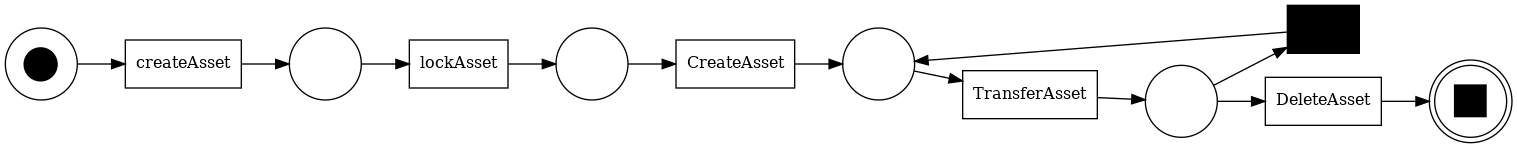

[{'alignment': [('InitializeAsset', '>>'), ('>>', 'createAsset'), ('>>', 'lockAsset'), ('CreateAsset', 'CreateAsset'), ('LockAsset', '>>'), ('TransferAsset', 'TransferAsset'), ('>>', None), ('TransferAsset', 'TransferAsset'), ('DeleteAsset', 'DeleteAsset')], 'cost': 40001, 'visited_states': 9, 'queued_states': 23, 'traversed_arcs': 24, 'lp_solved': 2, 'fitness': 0.6363636363636364, 'bwc': 110000}, {'alignment': [('InitializeAsset', '>>'), ('>>', 'createAsset'), ('>>', 'lockAsset'), ('CreateAsset', 'CreateAsset'), ('LockAsset', '>>'), ('TransferAsset', 'TransferAsset'), ('>>', None), ('TransferAsset', 'TransferAsset'), ('DeleteAsset', 'DeleteAsset')], 'cost': 40001, 'visited_states': 9, 'queued_states': 23, 'traversed_arcs': 24, 'lp_solved': 2, 'fitness': 0.6363636363636364, 'bwc': 110000}]


In [5]:

log = import_csv_original(file_path)
log_other_model = import_csv_original(file_path_other_model)

net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(log)

gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

aligned_traces = pm4py.conformance_diagnostics_alignments(log_other_model, net, initial_marking, final_marking)

print(aligned_traces)
